In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import CollisionModule

In [2]:
import torch
from scipy import interpolate

In [3]:
DXsec_Al = np.load('./DXsec_Al_1e8.npy')

In [4]:
import DSMC_depoSimulator_generateWithtime

In [143]:
# cell model construct

#              - end
#            -
#          -
#        -
#      -
#    - start

# direction x, y; start (x, y, z)
def slide2D_fractionZ(film, start, end, direction, value):
    if direction == 'y':
        slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[1] - start[1]))
        print('y', slit)
        for i in range(np.abs(end[1] - start[1])):
            if end[1] > start[1]:
                film[start[0]:end[0], start[1] + i, start[2]:start[2] + int(slit[i])] = value
                for j in range(np.abs(int(slit[0]-slit[1]))):
                    film[start[0]:end[0], start[1] + i,start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
            elif end[1] < start[1]:
                film[start[0]:end[0], start[1] - i, start[2]:start[2] + int(slit[i])] = value
                for j in range(np.abs(int(slit[0]-slit[1]))):
                    film[start[0]:end[0], start[1] - i,start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
    elif direction == 'x':
        slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[0] - start[0]))
        print('x',slit)
        for i in range(np.abs(end[0] - start[0])):
            print(i)
            if end[0] > start[0]:
                film[start[0] + i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
                for j in range(np.abs(int(slit[0]-slit[1]))):
                    film[start[0] + i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
            elif end[0] < start[0]:
                film[start[0] - i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
                for j in range(np.abs(int(slit[0]-slit[1]))):
                    film[start[0] - i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
    return film

In [52]:
45.2/38

1.1894736842105265

In [75]:
115/96

1.1979166666666667

In [66]:
2.46/45.2

0.05442477876106194

In [68]:
6/115

0.05217391304347826

In [78]:
13.5/38

0.35526315789473684

In [79]:
34/96

0.3541666666666667

In [82]:
(45.2-25.3)/45.2

0.44026548672566373

In [91]:
(115-65)/115

0.43478260869565216

In [90]:
115-64

51

In [94]:
34/38

0.8947368421052632

In [97]:
86/96

0.8958333333333334

In [100]:
108/34

3.176470588235294

In [107]:
273/86

3.1744186046511627

In [111]:
(108-60.7869)/108

0.4371583333333333

In [120]:
(273-154)/273

0.4358974358974359

In [122]:
(45.2-19.1)/45.2

0.577433628318584

In [128]:
(115-49)/115

0.5739130434782609

In [129]:
115-49

66

In [251]:
# cell model construct

#              - end
#            -
#          -
#        -
#      -
#    - start

# direction x, y; start (x, y, z)
def slide2D_fractionX(film, start, end, direction, fraction, value):
    if fraction == '+':
        if direction == 'y':
            slit = np.linspace(0, np.abs(end[0] - start[0]), np.abs(end[1] - start[1]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('y', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[1] - start[1])):
                if end[1] > start[1]:
                    film[start[0]:start[0] + int(slit[i]), start[1] + i, start[2]:end[2]] = value
                    for j in range(fraction):
                        film[start[0]+int(slit[i])+j, start[1] + i,start[2]:end[2]] = 1/(fraction+1)*(fraction-j)
                elif end[1] < start[1]:
                    film[start[0]:start[0] + int(slit[i]), start[1] - i, start[2]:end[2]] = value
                    for j in range(fraction):
                        film[start[0]+int(slit[i])+j, start[1] - i,start[2]:end[2]] = 1/(fraction+1)*(fraction-j)
        elif direction == 'z':
            slit = np.linspace(0, np.abs(end[0] - start[0]), np.abs(end[2] - start[2]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('z', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[2] - start[2])):
                if end[2] > start[2]:
                    film[start[0]:start[0] + int(slit[i]), start[1]:end[1], start[2] + i] = value
                    for j in range(fraction):
                        film[start[0]+int(slit[i])+j, start[1]:end[1], start[2] + i] = 1/(fraction+1)*(fraction-j)
                elif end[2] < start[2]:
                    film[start[0]:start[0] + int(slit[i]), start[1]:end[1], start[2] - i] = value
                    for j in range(fraction):
                        film[start[0]+int(slit[i])+j, start[1]:end[1], start[2] - i] = 1/(fraction+1)*(fraction-j)
    elif fraction == '-':
        if direction == 'y':
            slit = np.linspace(0, np.abs(end[0] - start[0]), np.abs(end[1] - start[1]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('y', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[1] - start[1])):
                if end[1] > start[1]:
                    film[start[0] - int(slit[i]):start[0], start[1] + i, start[2]:end[2]] = value
                    for j in range(fraction):
                        film[start[0]-int(slit[i])-j, start[1] + i,start[2]:end[2]] = 1/(fraction+1)*(fraction-j)
                elif end[1] < start[1]:
                    film[start[0] - int(slit[i]):start[0], start[1] - i, start[2]:end[2]] = value
                    for j in range(fraction):
                        film[start[0]-int(slit[i])-j, start[1] - i,start[2]:end[2]] = 1/(fraction+1)*(fraction-j)
        elif direction == 'z':
            slit = np.linspace(0, np.abs(end[0] - start[0]), np.abs(end[2] - start[2]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('z', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[2] - start[2])):
                if end[2] > start[2]:
                    film[start[0] - int(slit[-i]):start[0], start[1]:end[1], start[2] + i] = value
                    for j in range(fraction):
                        film[start[0]-int(slit[-i])-j, start[1]:end[1], start[2] + i] = 1/(fraction+1)*(fraction-j)
                elif end[2] < start[2]:
                    film[start[0] - int(slit[-i]):start[0], start[1]:end[1], start[2] - i] = value
                    for j in range(fraction):
                        film[start[0]-int(slit[-i])-j, start[1]:end[1], start[2] - i] = 1/(fraction+1)*(fraction-j)
    return film

In [ ]:
# direction x, y; start (x, y, z)
def slide2D_fractionZ(film, start, end, direction, value):
    if direction == 'y':
        slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[1] - start[1]))
        print('y', slit)
        for i in range(np.abs(end[1] - start[1])):
            if end[1] > start[1]:
                film[start[0]:end[0], start[1] + i, start[2]:start[2] + int(slit[i])] = value
                for j in range(np.abs(int(slit[0]-slit[1]))):
                    film[start[0]:end[0], start[1] + i,start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
            elif end[1] < start[1]:
                film[start[0]:end[0], start[1] - i, start[2]:start[2] + int(slit[i])] = value
                for j in range(np.abs(int(slit[0]-slit[1]))):
                    film[start[0]:end[0], start[1] - i,start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
    elif direction == 'x':
        slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[0] - start[0]))
        print('x',slit)
        for i in range(np.abs(end[0] - start[0])):
            print(i)
            if end[0] > start[0]:
                film[start[0] + i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
                for j in range(np.abs(int(slit[0]-slit[1]))):
                    film[start[0] + i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
            elif end[0] < start[0]:
                film[start[0] - i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
                for j in range(np.abs(int(slit[0]-slit[1]))):
                    film[start[0] - i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(value+1)*(slit[0]-slit[1]-j)
    return film

In [255]:
def slide2D_fractionZ(film, start, end, direction, fraction, value):
    if fraction == '+':
        if direction == 'y':
            slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[1] - start[1]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('y', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[1] - start[1])):
                if end[1] > start[1]:
                    film[start[0]:end[0], start[1] + i, start[2]:start[2] + int(slit[i])] = value
                    for j in range(fraction):
                        film[start[0]:end[0], start[1] + i,start[2]+int(slit[i])+j] = 1/(fraction+1)*(fraction-j)
                elif end[1] < start[1]:
                    film[start[0]:end[0], start[1] - i, start[2]:start[2] + int(slit[i])] = value
                    for j in range(fraction):
                        film[start[0]:end[0], start[1] - i,start[2]+int(slit[i])+j] = 1/(fraction+1)*(fraction-j)
        elif direction == 'x':
            slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[0] - start[0]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('x', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[2] - start[2])):
                if end[0] > start[0]:
                    film[start[0] + i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
                    for j in range(fraction):
                        film[start[0] + i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(fraction+1)*(fraction-j)
                elif end[0] < start[0]:
                    film[start[0] - i, start[1]:end[1], start[2]:start[2] + int(slit[i])] = value
                    for j in range(fraction):
                        film[start[0] - i, start[1]:end[1], start[2]+int(slit[i])+j] = 1/(fraction+1)*(fraction-j)
    elif fraction == '-':
        if direction == 'y':
            slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[1] - start[1]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('y', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[1] - start[1])):
                if end[1] > start[1]:
                    film[start[0]:end[0], start[1] + i, start[2] - int(slit[i]):start[2]] = value
                    for j in range(fraction):
                        film[start[0]:end[0], start[1] + i,start[2]-int(slit[i])-j] = 1/(fraction+1)*(fraction-j)
                elif end[1] < start[1]:
                    film[start[0]:end[0], start[1] - i, start[2] - int(slit[i]):start[2]] = value
                    for j in range(fraction):
                        film[start[0]:end[0], start[1] - i,start[2]-int(slit[i])-j] = 1/(fraction+1)*(fraction-j)
        elif direction == 'x':
            slit = np.linspace(0, np.abs(end[2] - start[2]), np.abs(end[0] - start[0]))
            fraction = np.abs(int(slit[0]-slit[1]))
            print('x', slit)
            print('fraction', fraction)
            for i in range(np.abs(end[2] - start[2])):
                if end[0] > start[0]:
                    film[start[0] + i, start[1]:end[1], start[2] - int(slit[i]):start[2]] = value
                    for j in range(fraction):
                        film[start[0] + i, start[1]:end[1], start[2] - int(slit[i]):start[2]] = 1/(fraction+1)*(fraction-j)
                elif end[0] < start[0]:
                    film[start[0] - i, start[1]:end[1], start[2] - int(slit[i]):start[2]] = value
                    for j in range(fraction):
                        film[start[0] - i, start[1]:end[1], start[2] - int(slit[i]):start[2]] = 1/(fraction+1)*(fraction-j)
    return film

In [241]:
film = np.zeros((277, 100, 120))

bottom = 5
film[:, :, 0:bottom] = 10 # bottom

side_wall = 2
film[:, :side_wall, :] = 10 # left
film[:, -side_wall:, :] = 10 # right


# #dfsdfsdfasdf
# height = 80
# left_side = 75
# right_side = 75

# film = slide2D_fractionZ(film=film, start=[2, 67, 5], end=[88, 98, 56], direction='y', value=10)
# film = slide2D_fractionZ(film=film, start=[2, 32, 5], end=[88, 1, 56], direction='y', value=10)

film = slide2D_fractionX(film=film, start=[275, 2, 4], end=[88, 98, 66], direction='z', fraction='-', value=10)

z [  0.           3.06557377   6.13114754   9.19672131  12.26229508
  15.32786885  18.39344262  21.45901639  24.52459016  27.59016393
  30.6557377   33.72131148  36.78688525  39.85245902  42.91803279
  45.98360656  49.04918033  52.1147541   55.18032787  58.24590164
  61.31147541  64.37704918  67.44262295  70.50819672  73.57377049
  76.63934426  79.70491803  82.7704918   85.83606557  88.90163934
  91.96721311  95.03278689  98.09836066 101.16393443 104.2295082
 107.29508197 110.36065574 113.42622951 116.49180328 119.55737705
 122.62295082 125.68852459 128.75409836 131.81967213 134.8852459
 137.95081967 141.01639344 144.08196721 147.14754098 150.21311475
 153.27868852 156.3442623  159.40983607 162.47540984 165.54098361
 168.60655738 171.67213115 174.73770492 177.80327869 180.86885246
 183.93442623 187.        ]


In [252]:
film = np.zeros((40, 20, 20))

film = slide2D_fractionX(film=film, start=[0, 0, 10], end=[35, 20, 0], direction='z', fraction='+', value=10)

z [ 0.          3.88888889  7.77777778 11.66666667 15.55555556 19.44444444
 23.33333333 27.22222222 31.11111111 35.        ]
fraction 3


In [275]:
film = np.zeros((20, 20, 40))

film = slide2D_fractionZ(film=film, start=[0, 10, 35], end=[20, 0, 0], direction='y', fraction='-', value=10)

y [ 0.          3.88888889  7.77777778 11.66666667 15.55555556 19.44444444
 23.33333333 27.22222222 31.11111111 35.        ]
fraction 3


In [276]:
depo1 = torch.Tensor(np.logical_and(film[:, :, :] !=0, film[:, :, :] < 10)).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(film[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:53499/index.html?ui=P_0x1cede38b4d0_72&reconnect=auto" class="pyvi…

In [277]:
film[5, 2, :]

array([ 0.  ,  0.  ,  0.25,  0.5 ,  0.75, 10.  , 10.  , 10.  , 10.  ,
       10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  ,
       10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  ,
       10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  , 10.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ])

In [184]:
depo1 = torch.Tensor(np.logical_and(film[:, :50, :] !=0, film[:, :50, :] < 10)).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(film[:, :50, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:53499/index.html?ui=P_0x1cc543abaa0_46&reconnect=auto" class="pyvi…

In [284]:
(19-8.1)/(108-60.7869)

0.23086812770184548

In [285]:
(108-60.7869)/108

0.4371583333333333

In [289]:
(273-153)/273

0.43956043956043955

In [293]:
(48-20)/(273-153)

0.23333333333333334

In [302]:
16.2/45.2

0.35840707964601765

In [307]:
41/115

0.3565217391304348

In [308]:
120-41

79

In [309]:
8.1/5.5

1.4727272727272727

In [315]:
20/13

1.5384615384615385

In [316]:
film = np.zeros((277, 100, 120))

bottom = 5
film[:, :, 0:bottom] = 10 # bottom

side_wall = 2
film[:, :side_wall, :] = 10 # left
film[:, -side_wall:, :] = 10 # right


# #dfsdfsdfasdf
# height = 80
# left_side = 75
# right_side = 75

film = slide2D_fractionZ(film=film, start=[2, 67, 5], end=[88, 98, 56], direction='y', fraction='+', value=10)
film = slide2D_fractionZ(film=film, start=[2, 32, 5], end=[88, 1, 56], direction='y', fraction='+', value=10)

film = slide2D_fractionX(film=film, start=[275, 29, 0], end=[153, 1, 120], direction='y', fraction='-', value=10)
film = slide2D_fractionX(film=film, start=[275, 70, 0], end=[153, 98, 120], direction='y', fraction='-', value=10)

film = slide2D_fractionX(film=film, start=[275, 35, 0], end=[88, 1, 79], direction='y', fraction='-', value=10)
film = slide2D_fractionX(film=film, start=[275, 64, 0], end=[88, 98, 79], direction='y', fraction='-', value=10)


film = slide2D_fractionX(film=film, start=[275, 2, 4], end=[88, 98, 66], direction='z', fraction='-', value=10)


film[:side_wall, :, :] = 10 # back
film[-side_wall:, :, :] = 10 # front

y [ 0.   1.7  3.4  5.1  6.8  8.5 10.2 11.9 13.6 15.3 17.  18.7 20.4 22.1
 23.8 25.5 27.2 28.9 30.6 32.3 34.  35.7 37.4 39.1 40.8 42.5 44.2 45.9
 47.6 49.3 51. ]
fraction 1
y [ 0.   1.7  3.4  5.1  6.8  8.5 10.2 11.9 13.6 15.3 17.  18.7 20.4 22.1
 23.8 25.5 27.2 28.9 30.6 32.3 34.  35.7 37.4 39.1 40.8 42.5 44.2 45.9
 47.6 49.3 51. ]
fraction 1
y [  0.           4.51851852   9.03703704  13.55555556  18.07407407
  22.59259259  27.11111111  31.62962963  36.14814815  40.66666667
  45.18518519  49.7037037   54.22222222  58.74074074  63.25925926
  67.77777778  72.2962963   76.81481481  81.33333333  85.85185185
  90.37037037  94.88888889  99.40740741 103.92592593 108.44444444
 112.96296296 117.48148148 122.        ]
fraction 4
y [  0.           4.51851852   9.03703704  13.55555556  18.07407407
  22.59259259  27.11111111  31.62962963  36.14814815  40.66666667
  45.18518519  49.7037037   54.22222222  58.74074074  63.25925926
  67.77777778  72.2962963   76.81481481  81.33333333  85.85185185
  90.3

In [317]:
depo1 = torch.Tensor(np.logical_and(film[:, :, :] !=0, film[:, :, :] < 10)).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(film[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:53499/index.html?ui=P_0x1d18b9960f0_81&reconnect=auto" class="pyvi…

In [301]:
depo1 = torch.Tensor(np.logical_and(film[:, :50, :] !=0, film[:, :50, :] < 10)).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(film[:, :50, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:53499/index.html?ui=P_0x1d18b996d80_80&reconnect=auto" class="pyvi…

Task exception was never retrieved
future: <Task finished name='Task-27471' coro=<WebSocketWriter.ping() done, defined at c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\aiohttp\http_websocket.py:711> exception=ConnectionResetError('Cannot write to closing transport')>
Traceback (most recent call last):
  File "c:\Users\urcs049\AppData\Local\anaconda3\Lib\asyncio\tasks.py", line 314, in __step_run_and_handle_result
    result = coro.send(None)
             ^^^^^^^^^^^^^^^
  File "c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\aiohttp\http_websocket.py", line 715, in ping
    await self._send_frame(message, WSMsgType.PING)
  File "c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\aiohttp\http_websocket.py", line 682, in _send_frame
    self._write(header + message)
  File "c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\aiohttp\http_websocket.py", line 702, in _write
    raise ConnectionResetError("Cannot write to closing transport")
Connection

In [66]:
logname = 'DSMCTS60_trenchDepo_0827'
test = DSMC_depoSimulator_generateWithtime.depo(mirror=True,collision=False,velNormalize=True,pressure_pa=0.2, temperature=300, chamberSize=film.shape, DXsec=DXsec_Al,
                               param = [1.6, -0.7], TS = 0.3, N = int(1e6), 
                               sub_xy=[0,0], film=film, n=1, cellSize=film.shape, 
                               celllength=1e-5, kdtreeN=5, tstep=1e-5, thickness=110,substrateTop=80,posGeneratorType='gen1', logname=logname)

deposit = test.depo_position_increase_cosVel(125,  int(1e6), 2e-2, 0.3, 5)

d:\ysy\etching\Collision.py:31: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))
running:  36%|███████████████████                                  | 36.0/100 [07:31<13:22, 12.5s/B]

depo finish


In [68]:
np.save('cvd_void_subDepo_thk110', deposit[0])

In [4]:
deposit0 = np.load('./For_etching_transport_TS60_deposit_0604_4.npy')

In [67]:
depo1 = torch.Tensor(deposit[0][:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(deposit[0][:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:59837/index.html?ui=P_0x2ae6d79fad0_22&reconnect=auto" class="pyvi…

In [12]:
deposit0 = np.load('./For_etching_transport_TS60_deposit_0624_SMD.npy')

In [13]:
deposit0.shape

(50, 200, 180)

In [14]:
# deposit0 = deposit0[:, :, :]
# deposit0 = deposit[0][:, :, :]
etchfilm = np.zeros((deposit0.shape))


deposit_etch_10 = deposit0 == 10
b = np.where(deposit_etch_10 == True)
deposit_etch_20 = deposit0 == 20
c = np.where(deposit_etch_20 == True)

etchfilm[b] = -50
etchfilm[c] = -10

In [7]:
etchfilm.shape

(50, 200, 180)

In [8]:
import DSMC_etchingSimulator_linearInput

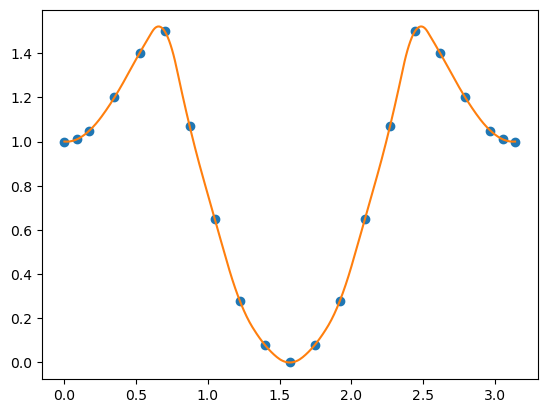

In [27]:
yield_hist = np.array([[1.0, 1.01, 1.05,  1.2,  1.4,  1.5, 1.07, 0.65, 0.28, 0.08,  0, \
                        0.08, 0.28,0.65,  1.07, 1.5, 1.4, 1.2, 1.05, 1.01, 1.0 ], \
                        [  0,  5,   10,   20,   30,   40,   50,   60,   70,   80, 90, \
                          100, 110, 120, 130, 140, 150, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1], yield_hist[0], 'o', xnew, ynew, '-')
plt.show()

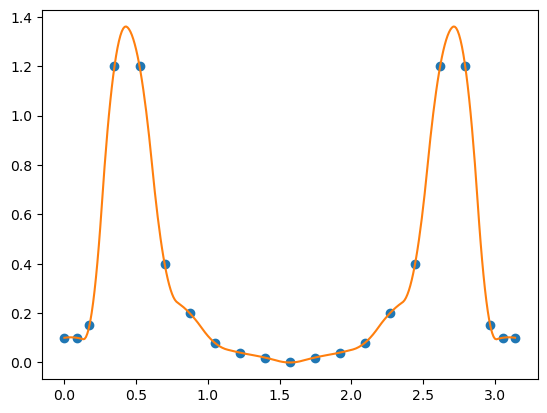

In [43]:
yield_hist = np.array([[0.1, 0.1, 0.15,  1.2,  1.2,  0.40, 0.2, 0.08, 0.04, 0.02,  0, \
                        0.02, 0.04, 0.08, 0.2, 0.40, 1.2, 1.2, 0.15, 0.1, 0.1], \
                        [  0,  5,   10,   20,   30,   40,   50,   60,   70,   80, 90, \
                         100, 110, 120, 130, 140, 150, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1], yield_hist[0], 'o', xnew, ynew, '-')
plt.show()

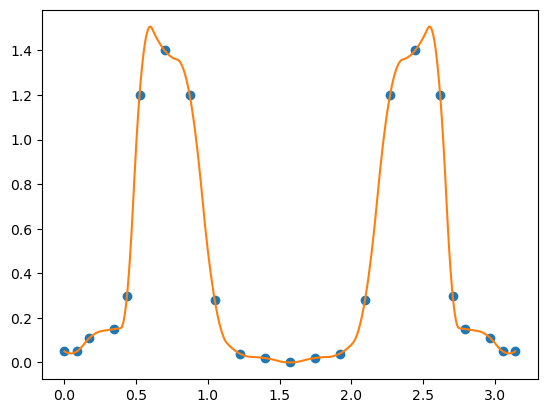

In [9]:
yield_hist = np.array([[0.05, 0.05, 0.11,  0.15, 0.3,  1.2,  1.40, 1.2, 0.28, 0.04, 0.02,  0, \
                        0.02, 0.04, 0.28, 1.2, 1.40, 1.2, 0.3,  0.15, 0.11, 0.05, 0.05], \
                        [  0,  5,   10,   20, 25,  30,   40,   50,   60,   70,   80, 90, \
                         100, 110, 120, 130, 140, 150, 155, 160, 170, 175, 180]])
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1], yield_hist[0], 'o', xnew, ynew, '-')
plt.show()

(2, 23)


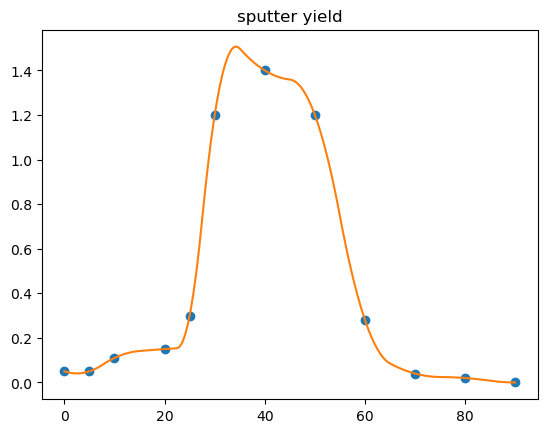

In [25]:
yield_hist = np.array([[0.05, 0.05, 0.11,  0.15, 0.3,  1.2,  1.40, 1.2, 0.28, 0.04, 0.02,  0, \
                        0.02, 0.04, 0.28, 1.2, 1.40, 1.2, 0.3,  0.15, 0.11, 0.05, 0.05], \
                        [  0,  5,   10,   20, 25,  30,   40,   50,   60,   70,   80, 90, \
                         100, 110, 120, 130, 140, 150, 155, 160, 170, 175, 180]])

print(yield_hist.shape)
yield_hist[1] *= np.pi/180
yield_func = interpolate.interp1d(yield_hist[1], yield_hist[0], kind='quadratic')

xnew = np.arange(0, np.pi/2, 0.01)
# xnew = np.array([])
ynew = yield_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(yield_hist[1][:12]/(np.pi/180), yield_hist[0][:12], 'o', xnew/(np.pi/180), ynew, '-')
plt.title('sputter yield')
plt.show()

In [15]:
logname = 'DSMCTS60_etching_0624'
testEtch = DSMC_etchingSimulator_linearInput.etching(mirror=True, pressure_pa=0.001, temperature=300, chamberSize=etchfilm.shape, DXsec=DXsec_Al,
                                         center_with_direction=np.array([[35,100,75]]), 
                                         range3D=np.array([[0, 70, 0, 100, 0, 150]]), InOrOut=[1], yield_hist=yield_hist,
                                        param = [1.6, -0.7], TS = 0.3, N = 500000, 
                                        sub_xy=[0,0], film=etchfilm, n=101, cellSize=etchfilm.shape, 
                                        celllength=1e-5, kdtreeN=5, tstep=1e-8,
                                        thickness=124,substrateTop=80,posGeneratorType='top', logname=logname)
etching = testEtch.depo_position_increase_cosVel(125,  500000, 1e-5, 0.5, 10)

l:\ysy\etching\Collision.py:31: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))
running: 100%|██████████████████████████████████████████████████████| 100/100 [15:17<00:00, 9.17s/B]


In [16]:
etched = torch.Tensor(deposit0[:, :, :]==20).to_sparse()
etched = etched.indices().numpy().T

substrute = torch.Tensor(etching[0][:, :, :]==-10).to_sparse()
substrute = substrute.indices().numpy().T

trench = torch.Tensor(etching[0][:, :, :]==-50).to_sparse()
trench = trench.indices().numpy().T

depomesh = pv.PolyData(etched)
depomesh["radius"] = np.ones(etched.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

trenchmesh = pv.PolyData(trench)
trenchmesh["radius"] = np.ones(trench.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
trenchglyphed = trenchmesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='pink')
p.add_mesh(subglyphed, color='cyan')
p.add_mesh(trenchglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:55777/index.html?ui=P_0x1a9882c0bd0_1&reconnect=auto" class="pyvis…

In [17]:
# etched = torch.Tensor(deposit0[:, :, :]==20).to_sparse()
# etched = etched.indices().numpy().T

substrute = torch.Tensor(etching[0][:, :, :]==-10).to_sparse()
substrute = substrute.indices().numpy().T

trench = torch.Tensor(etching[0][:, :, :]==-50).to_sparse()
trench = trench.indices().numpy().T

# depomesh = pv.PolyData(etched)
# depomesh["radius"] = np.ones(etched.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

trenchmesh = pv.PolyData(trench)
trenchmesh["radius"] = np.ones(trench.shape[0])*0.5

# Progress bar is a new feature on master branch
# depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)
trenchglyphed = trenchmesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
# p.add_mesh(depoglyphed, color='pink')
p.add_mesh(subglyphed, color='cyan')
p.add_mesh(trenchglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:55777/index.html?ui=P_0x1a988236d10_2&reconnect=auto" class="pyvis…

In [30]:
np.save('./TScompare/TS60_DSMC_etching_0624_SMD', etching[0])

In [40]:
edge_indices = np.logical_or(a[:,0] < 0.165, a[:,0] > 0.195)
edge_indices |= np.logical_or(a[:,1] < -0.015, a[:,1] > 0.015)
edge_indices |= np.array(a[:,2] > 0.2)
if np.any(edge_indices):
    edge_depo = a[~edge_indices]

print(edge_depo.shape)

(23388, 6)


In [41]:
for i in range(6):
    edge_depo = np.concatenate((edge_depo, edge_depo), axis=0)

print(edge_depo.shape)

(1496832, 6)


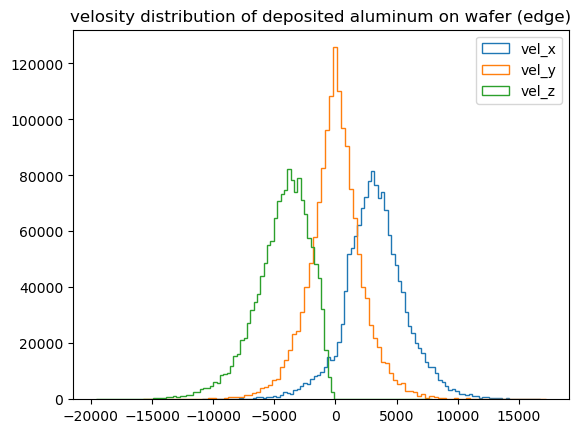

In [56]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [58]:
edge_depo2 = np.zeros_like(edge_depo)
edge_depo2[:,3] = edge_depo[:,4]
edge_depo2[:,4] = edge_depo[:,3]
edge_depo2[:,5] = edge_depo[:,5]

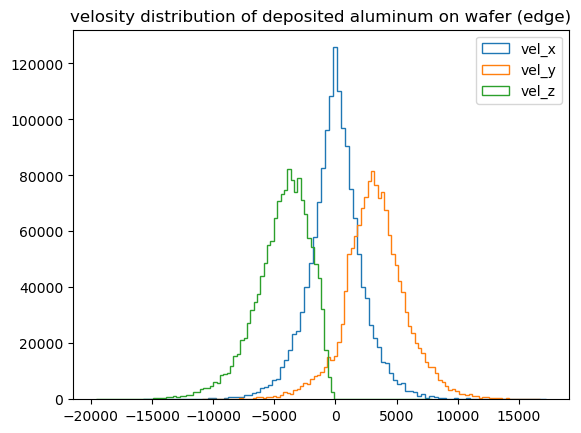

In [59]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo2[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo2[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo2[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [48]:
np.random.shuffle(edge_depo)

In [49]:
edge_depo.shape

(1496832, 6)

In [61]:
logname = 'DSMCTS60_trenchDepo_0624_edge'
test = DSMC_depoSimulator_generateWithtime.depo(mirror=True,pressure_pa=0.2, temperature=300, chamberSize=film.shape, DXsec=DXsec_Al,
                               param = [1.6, -0.7], TS = 0.3, N = edge_depo2.shape[0], 
                               sub_xy=[0,0], film=film, n=1, cellSize=film.shape, 
                               celllength=1e-5, kdtreeN=5, tstep=5e-10, thickness=117,substrateTop=80,posGeneratorType='gen1', logname=logname)

deposit = test.depo_position_increase(125,  edge_depo2[:, 3:], 2e-6, 0.3, 30)

l:\ysy\etching\Collision.py:31: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))
running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

running:  91%|██████████████████████████████████████████████▍    | 91.0/100 [1:07:15<06:39, 44.3s/B]

depo finish


In [63]:
np.save('./TScompare/TS60_DSMC_edge_SMD_0624', deposit[0])

In [62]:
depo1 = torch.Tensor(deposit[0][:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(deposit[0][:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show_grid()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
l:\program\Lib\site-packages\pyvista\core\filters\data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:55777/index.html?ui=P_0x1aa62deb790_9&reconnect=auto" class="pyvis…